In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [5]:
def handle(a):
    a=str(a).split('/')
    a = a[0]
    return float(a)
df['rate']=df['rate'].apply(handle)

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


## Numbers of Dinings 

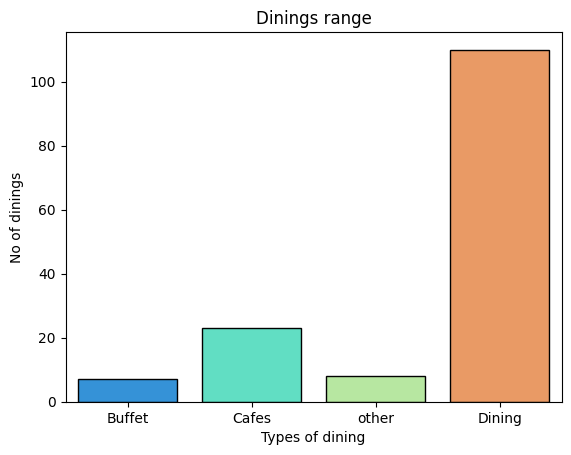

In [16]:
sns.countplot(x=df['listed_in(type)'],palette='rainbow',edgecolor='black')
plt.title("Dinings range")
plt.xlabel("Types of dining")
plt.ylabel("No of dinings")
plt.show()

## Votes wize dinings

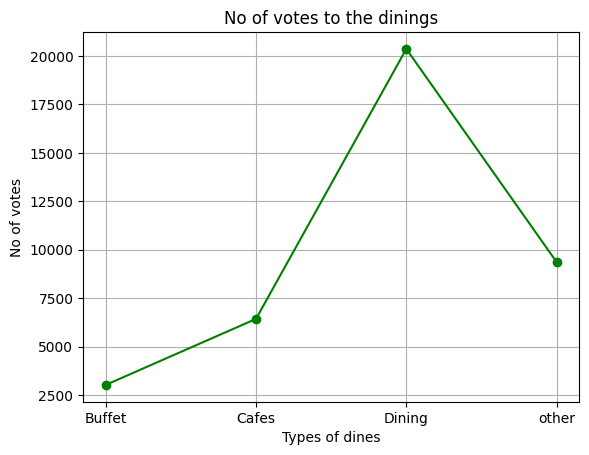

In [18]:
group = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':group})
plt.plot(result,color='green',marker='o')
plt.title("No of votes to the dinings")
plt.ylabel('No of votes')
plt.xlabel("Types of dines")
plt.grid()
plt.show()

## Resturant who got maximum votes

In [9]:
max =df['votes'].max()
df.loc[df['votes']==max]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
38,Empire Restaurant,Yes,No,4.4,4884,750,other


## Online Booking status

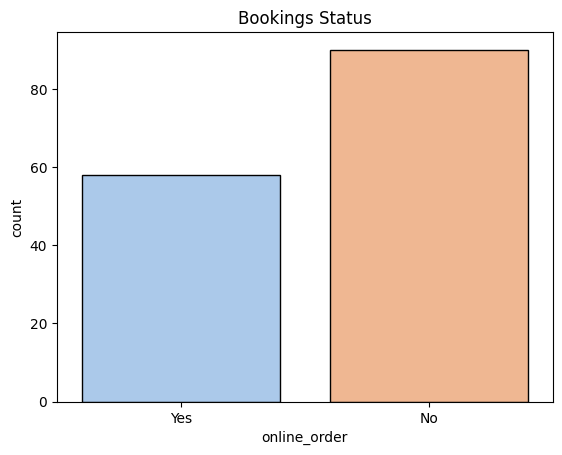

In [19]:
sns.countplot(x=df['online_order'],palette='pastel',edgecolor='black')
plt.title("Bookings Status")
plt.show()

## Rate Status

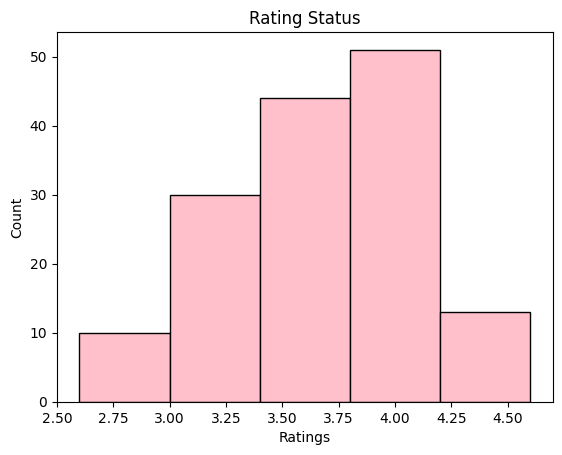

In [15]:
plt.hist(x=df['rate'],bins=5,color='pink',edgecolor='black')
plt.title('Rating Status')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

## Cost for two

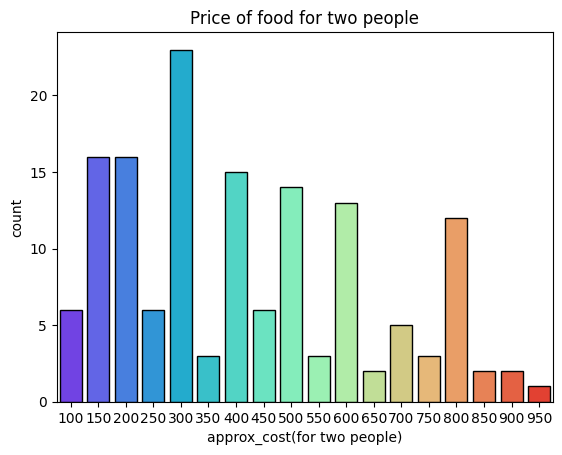

In [20]:
sns.countplot(x=df['approx_cost(for two people)'],palette='rainbow',edgecolor='black')
plt.title('Price of food for two people')
plt.show()

## Rating Status

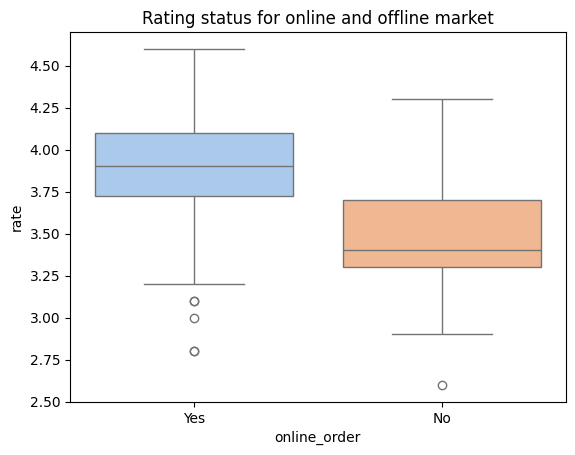

In [22]:
sns.boxplot(x=df['online_order'],y=df['rate'],palette='pastel')
plt.title("Rating status for online and offline market")
plt.show()

# Dashboard

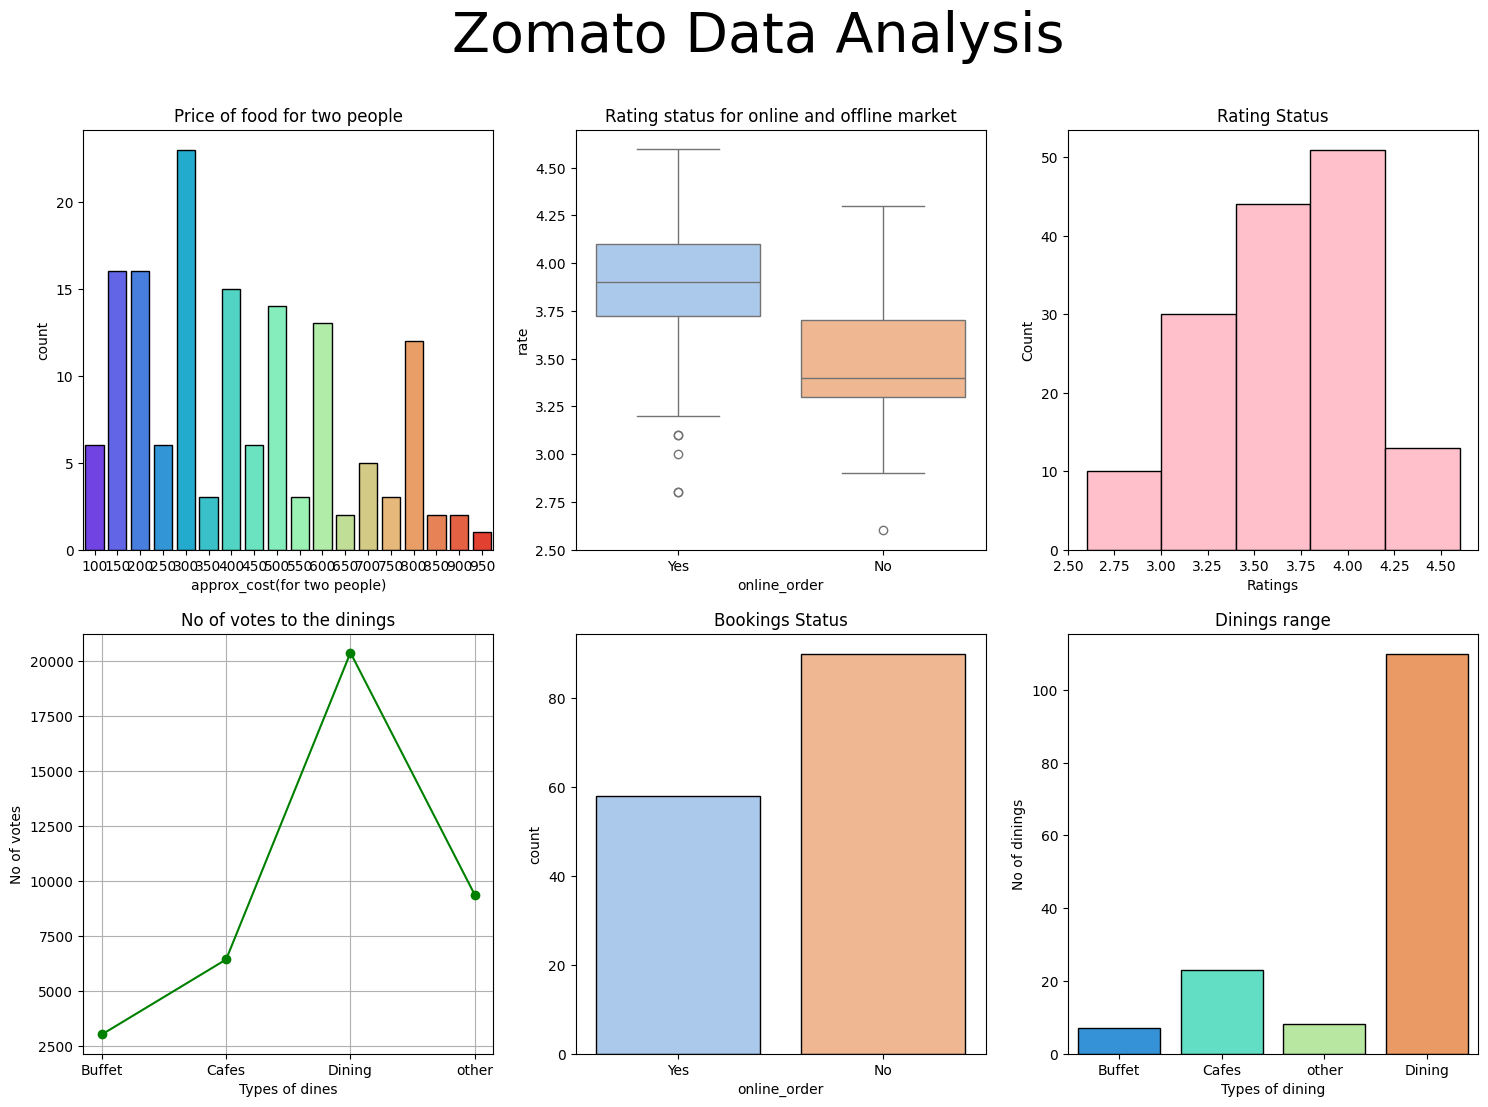

In [24]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
sns.countplot(x=df['approx_cost(for two people)'],palette='rainbow',edgecolor='black')
plt.title('Price of food for two people')


plt.subplot(2,3,2)
sns.boxplot(x=df['online_order'],y=df['rate'],palette='pastel')
plt.title("Rating status for online and offline market")


plt.subplot(2,3,3)
plt.hist(x=df['rate'],bins=5,color='pink',edgecolor='black')
plt.title('Rating Status')
plt.xlabel('Ratings')
plt.ylabel('Count')


plt.subplot(2,3,4)
group = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':group})
plt.plot(result,color='green',marker='o')
plt.title("No of votes to the dinings")
plt.ylabel('No of votes')
plt.xlabel("Types of dines")
plt.grid()


plt.subplot(2,3,5)
sns.countplot(x=df['online_order'],palette='pastel',edgecolor='black')
plt.title("Bookings Status")


plt.subplot(2,3,6)
sns.countplot(x=df['listed_in(type)'],palette='rainbow',edgecolor='black')
plt.title("Dinings range")
plt.xlabel("Types of dining")
plt.ylabel("No of dinings")

plt.suptitle("Zomato Data Analysis",fontsize=40)
plt.show()
